# Mixture of QCBM for clustering

## import dataset

In [1]:
import dataset
nb_point = 1000
dataset1, true_labels1 = dataset.two_gauss_3D(nb_point)
data = [dataset1]
true_labels = [true_labels1]
nb_dataset = len(data)

In [2]:
dataset_path = ["/two_gauss_3D"]

# clustering

In [3]:
from sklearn.cluster import KMeans, DBSCAN
from function_clustering import clustering
import matplotlib.pyplot as plt
import time
time_ = []
labels = []
save = 1

## k_means

In [4]:
name_methode = ["k-mean"]
label0 = []
start = time.time()
for X in data:
    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
    l = kmeans.labels_
    label0.append(l)
end = time.time()
time_.append(end-start)
labels.append(label0)

In [5]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label0[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.56
Davies-Bouldin Index: 0.59
Calinski-Harabasz Index: 1295.74
Adjusted Rand Index: 0.9549217
Normalized Mutual Information (NMI): 0.9073693



## DBSCAN

In [28]:
name_methode.append("DBSCAN")
start = time.time()
label1 = []
for X in data:
    dbscan =  DBSCAN(eps=0.1, min_samples=15).fit(X)
    l = dbscan.labels_
    l[l==-1] = 2
    l[l==0] = 3
    label1.append(l)
end = time.time()
time_.append(end-start)
labels.append(label1)

In [29]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label1[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.39
Davies-Bouldin Index: 3.57
Calinski-Harabasz Index: 542.80
Adjusted Rand Index: 0.7543940
Normalized Mutual Information (NMI): 0.7206952



## Network Mixture

In [8]:
name_methode.append("Neural\nNetwork Mixture")
from generator.NN import NN
model = NN
epoch_init = 50
taille_batch_init = 50
learning_rate_init = 0.001
epoch_EM = 200
taille_batch_EM = 50
learning_rate_EM = 1e-3
label2 = []
start = time.time()
i=0
for X in data:
    print("dataset ",i)
    path = "./NetworkMixture" + dataset_path[i]
    label2.append(clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path))
    i+=1
end = time.time()
time_.append(end-start)
labels.append(label2)

dataset  0


In [9]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label2[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.56
Davies-Bouldin Index: 0.58
Calinski-Harabasz Index: 1288.93
Adjusted Rand Index: 0.9862887
Normalized Mutual Information (NMI): 0.9647999



### Continuous QCBM Mixture

In [10]:
name_methode.append("Continuous QCBM \nMixture")
from generator.Continuous_QCBM import Continuous_QCBM
model = Continuous_QCBM()
epoch_init = 30
taille_batch_init = 50
learning_rate_init = 1e-2
epoch_EM = 50
taille_batch_EM = 50
learning_rate_EM = 5e-3
label3 = []
start = time.time()
i=0
for X in data:
    print("dataset ",i)
    path = "./ContinusMixture_3D" + dataset_path[i]
    label3.append(clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path))
    i+=1
end = time.time()
time_.append(end-start)
labels.append(label3)

dataset  0


In [11]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label3[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.43
Davies-Bouldin Index: 1.24
Calinski-Harabasz Index: 494.76
Adjusted Rand Index: 0.6897613
Normalized Mutual Information (NMI): 0.6047120



### Discrete QCBM Mixture

In [12]:
name_methode.append("Discrete QCBM \nMixture")
from generator.Discrete_QCBM import Discrete_QCBM
model = Discrete_QCBM(16,3*(0,1))
epoch_init = 500
taille_batch_init = 500
learning_rate_init = 5e-3
epoch_EM = 500
taille_batch_EM = 500
learning_rate_EM = 5e-3
label4 = []
start = time.time()
i=0
for X in data:
    print("dataset ",i)
    path = "./DiscreteMixture_3D" + dataset_path[i]
    label4.append(clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path))
    i+=1
end = time.time()
time_.append(end-start)
labels.append(label4)

dataset  0


In [13]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label4[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.56
Davies-Bouldin Index: 0.57
Calinski-Harabasz Index: 1286.18
Adjusted Rand Index: 0.9908410
Normalized Mutual Information (NMI): 0.9748888



# Result

In [30]:
labels = [label0,label1,label2,label3,label4]

1 5


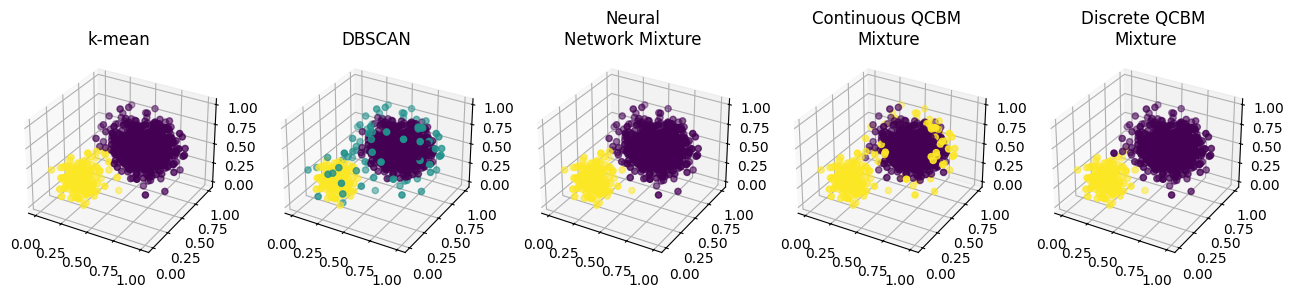

In [31]:
n = len(data)
m = 5
print(n, m)
#f, axis = plt.subplots(n, m, figsize=(16, 8))
fig = plt.figure(figsize=(16, 8))
for j in range(m):
    #axis[0,j].set_title(name_methode[j], fontsize=17)
    for i in range(n):
        #axis[i,j].scatter(data[i][:,0],data[i][:,1], c=labels[j][i])
        #axis[i,j].set_xticks([])
        #axis[i,j].set_yticks([])
        ax = fig.add_subplot(n, m, 1 + (i*m) + j, projection='3d')
        ax.set_title(name_methode[j], fontsize=12)
        ax.scatter(data[i][:,0],data[i][:,1], data[i][:,2], c=labels[j][i])
        #ax.set_xticks([])
        #ax.set_yticks([])
        #ax.set_zticks([])
        #ax.view_init(elev=15, azim=0, roll=0)
        #ax.view_init(elev=50., azim=40, roll=0)
        if j in [2,3]:
            for axis_ in ['top','bottom','left','right']:
                ax.spines[axis_].set_linewidth(6)

#for i in [0,1]:
#    for j in [2,3]:
#        for axis_ in ['top','bottom','left','right']:
#            axis[i,j].spines[axis_].set_linewidth(6)

#f.suptitle(" ", fontsize=20)
fig.savefig('./img/resClustering_3D.png')
plt.show()

In [16]:
print("time :")

for i in range(m):
    print(name_methode[i], " -  mean time :", time_[i]/nb_dataset, "s")

time :
k-mean  -  mean time : 0.017296791076660156 s
DBSCAN  -  mean time : 0.059374094009399414 s
Neural
Network Mixture  -  mean time : 11.332624435424805 s
Continuous QCBM 
Mixture  -  mean time : 3162.0735926628113 s
Discrete QCBM 
Mixture  -  mean time : 4303.351175785065 s


# generative

In [17]:
import torch
import function_train
data_tot = []
labels2 = []
name_methode2 = []
nb_point_gen = 600

In [18]:
name_methode2.append("Continuous QCBM\nMixture")
from generator.Continuous_QCBM import Continuous_QCBM
model = Continuous_QCBM()
data_gen = []
label = []

i=0
for X in data:
    models = function_train.mixture_generator(2, model, 3)
    path = "./ContinusMixture_3D" + dataset_path[i]
    models.load(path)
    res, l = function_train.point(models, X, nb_point*[0], nb_point_gen, 2)
    data_gen.append(res)
    label.append(l)
    i+=1
data_tot.append(data_gen)
labels2.append(label)

In [19]:
name_methode2.append("Discrete QCBM\nMixture")
from generator.Discrete_QCBM import Discrete_QCBM
model = Discrete_QCBM(16,3*(0,1))
data_gen = []
label = []

i=0
for X in data:
    models = function_train.mixture_generator(2, model, 3)
    path = "./DiscreteMixture_3D" + dataset_path[i]
    models.load(path)
    res, l = function_train.point(models, X, nb_point*[0], nb_point_gen, 2)
    data_gen.append(res)
    label.append(l)
    i+=1
data_tot.append(data_gen)
labels2.append(label)

1 2


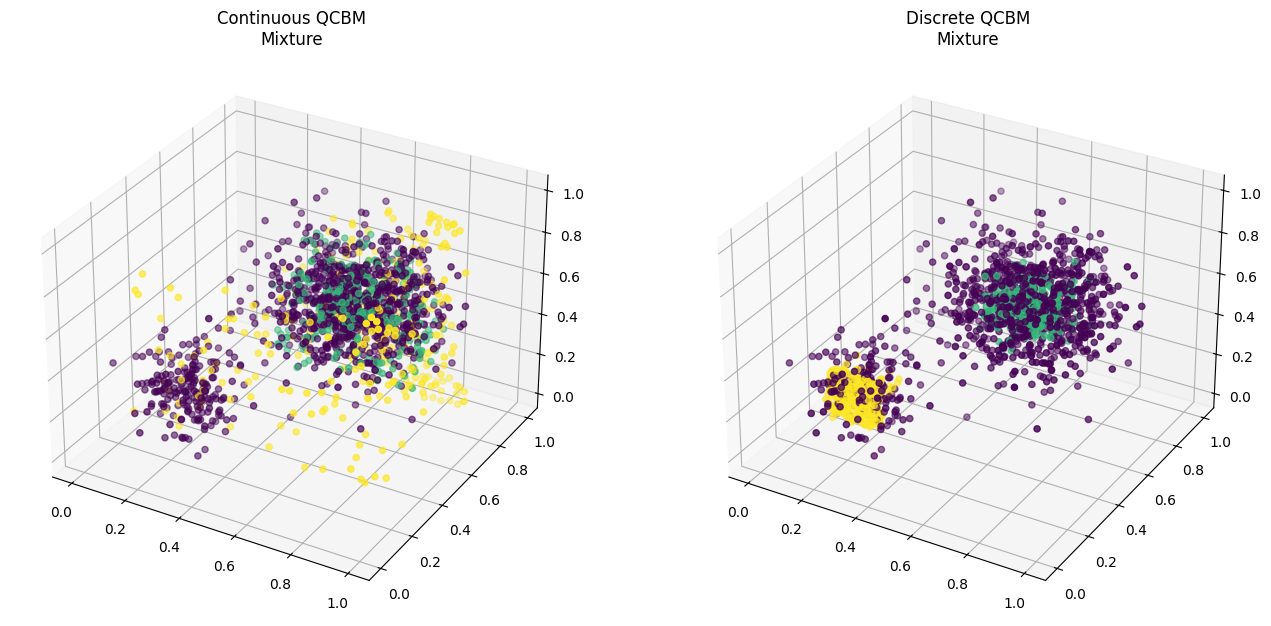

In [32]:
n = len(data)
m = 2
print(n, m)
fig = plt.figure(figsize=(16, 8))
for j in range(m):
    for i in range(n):
        ax = fig.add_subplot(n, m, 1 + (i*m) + j, projection='3d')
        ax.set_title(name_methode2[j], fontsize=12)
        #ax.scatter(data[i][:,0],data[i][:,1], data[i][:,2], c=labels[j][i])
        ax.scatter(data_tot[j][i][:,0],data_tot[j][i][:,1],data_tot[j][i][:,2], c=labels2[j][i])
        #ax.set_xticks([])
        #ax.set_yticks([])
        #ax.set_zticks([])
        #ax.view_init(elev=15, azim=0, roll=0)
        #ax.view_init(elev=50., azim=40, roll=0)

fig.savefig('./img/resGenerative_3D.png')
plt.show()